<a href="https://colab.research.google.com/github/Yashwati-patel/Credit-Card-Default-Prediction/blob/main/Final_Notebbok_of__Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
# importing libraries

import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC


import warnings
warnings.filterwarnings('ignore')


In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# upload file
# change excel file to csv file
Df = pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT-1/File csv .csv')

In [4]:
# display first five Dataset
Df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
Df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [6]:
# check information of Dataset
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
print("Number of rows is: ", Df.shape[0])
print("Number of columns is: ", Df.shape[1])

Number of rows is:  30000
Number of columns is:  25


In [8]:
# Details of Dataset
Df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
# checking null values
Df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [10]:
Df.shape

(30000, 25)

In [11]:
#checking for duplicates
len(Df[Df.duplicated()])

0

# Exploratory Data Analysis

**Dependent Variable**

In [12]:
#renaming column
Df.rename(columns={'default payment next month' : 'DefaultPayment'}, inplace=True)

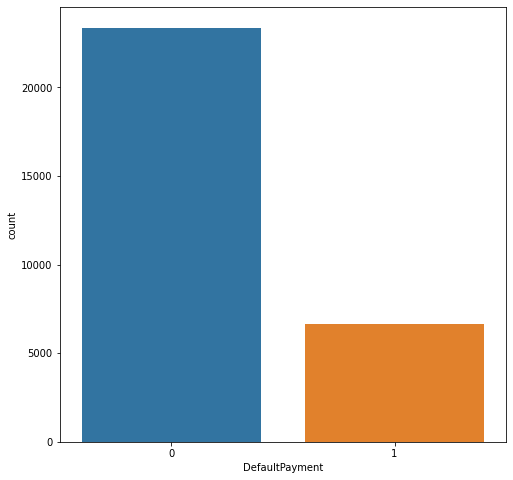

In [13]:
#  Showing Dependent variable
plt.figure(figsize=(8,8))
sns.countplot(x = 'DefaultPayment', data = Df)


**Independent Variable**

In [14]:
# Replace value
Df.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
Df.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
Df.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
Df.replace({'DefaultPayment' : {1 : 'Yes', 0 : 'No'}}, inplace = True)



* **SEX**




In [15]:
Df['SEX'].value_counts()

Female    18112
Male      11888
Name: SEX, dtype: int64

There are two types sex

1. Male
2. Female



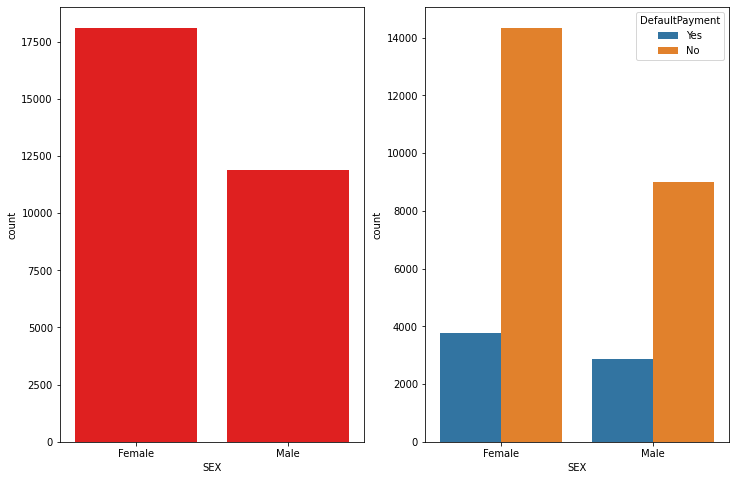

In [16]:
# Count plot for Sex with respect to DefaultPayment

fig, axes = plt.subplots(ncols=2,figsize=(12,8))
sns.countplot(x = 'SEX', ax = axes[0], data = Df, color='red')
sns.countplot(x = 'SEX', hue = 'DefaultPayment',ax = axes[1], data = Df)



*  **EDUCATION**




In [17]:
Df['EDUCATION'].value_counts()

University         14030
Graduate School    10585
High School         4917
5                    280
Others               123
6                     51
0                     14
Name: EDUCATION, dtype: int64

Types of Education:-

1.  Graduate School
2.  University
3.  High School
4.  Others







In [18]:
# Replcae values with 5, 6 and 0 to Others:
Df.EDUCATION = Df.EDUCATION.replace({5: "Others", 6: "Others",0: "Others"})

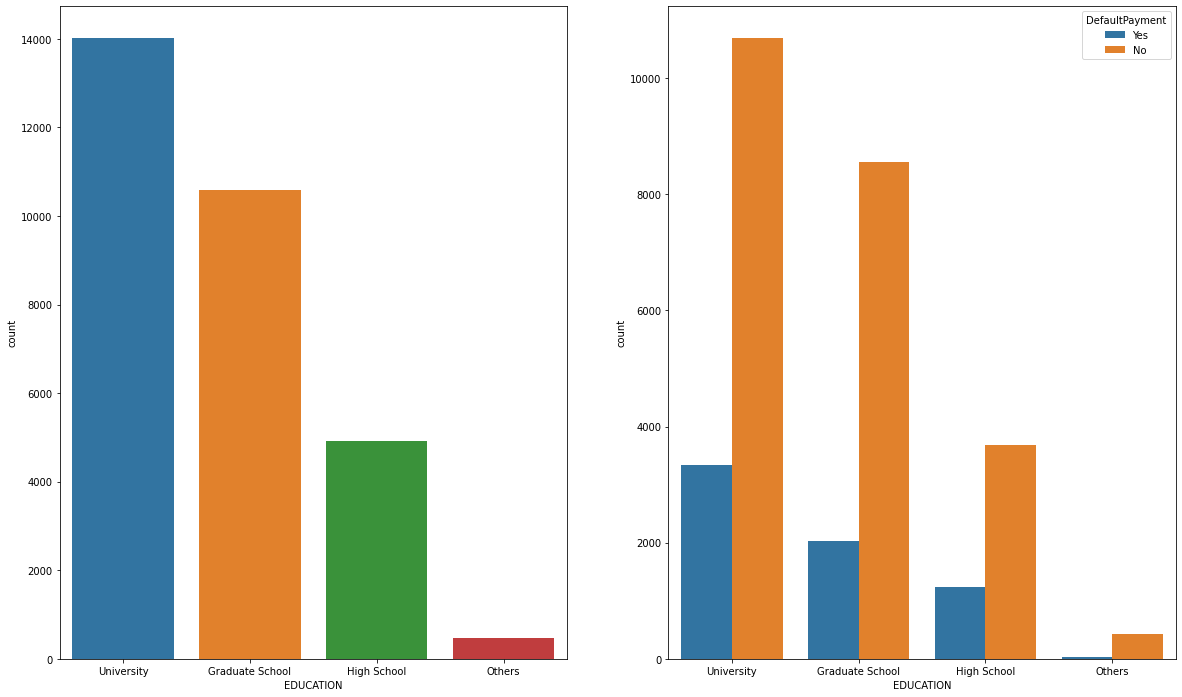

In [19]:
# Count plot for Education with respect to DefaultPayment
fig, axes = plt.subplots(ncols=2,figsize=(20,12))
sns.countplot(x = 'EDUCATION', ax = axes[0], data = Df)
sns.countplot(x = 'EDUCATION', hue = 'DefaultPayment',ax = axes[1], data = Df)



*  **MARRIAGE**




In [20]:
Df['MARRIAGE'].value_counts()

Single     15964
Married    13659
Others       323
0             54
Name: MARRIAGE, dtype: int64

Marriage Status:-

1.  Married
2.  Single
3.  Others



In [21]:
# Replace 0 with others:
Df.MARRIAGE = Df.MARRIAGE.replace({0: "Others"})

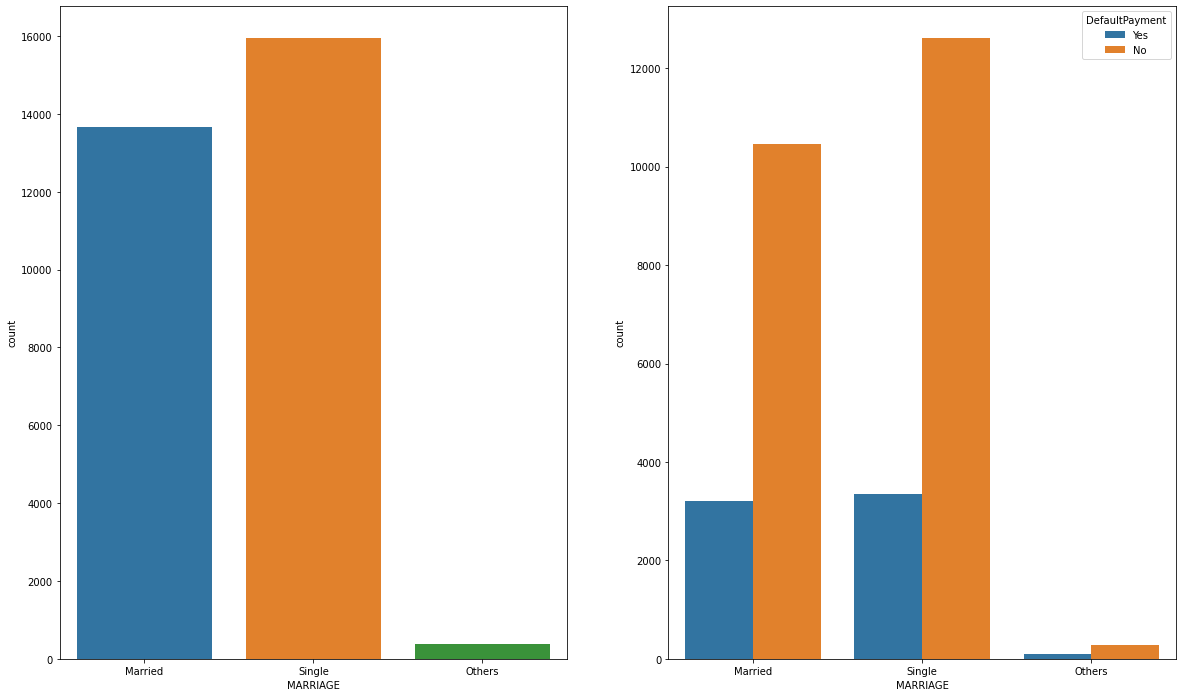

In [22]:
# Count plot for Marriage with respect to DefaultPayment
fig, axes = plt.subplots(ncols=2,figsize=(20,12))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = Df)
sns.countplot(x = 'MARRIAGE', hue = 'DefaultPayment',ax = axes[1], data = Df)



*  **AGE**




In [23]:
Df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

In [24]:
Df['AGE']= Df['AGE'].astype('int')

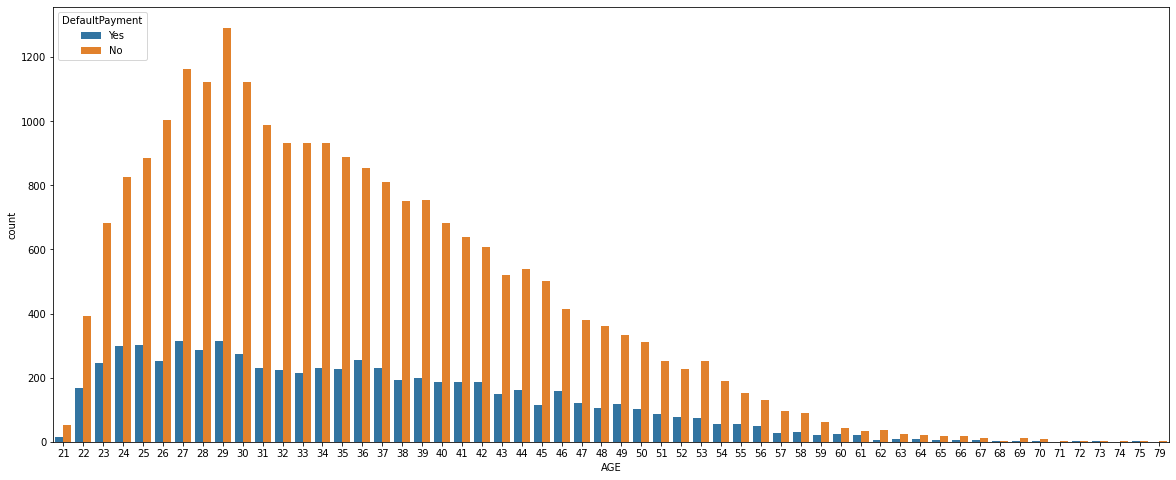

In [25]:
 # Count plot for AGE with respect to DefaultPayment

plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'DefaultPayment', data = Df)

**From above Analysis:-**

we can found that There are more females credit card holder as compare to others so no. of defaulter have high proportion of females.

No. of defaulters have a higher proportion of educated people (graduate school and university)

No. of defaulters have a higher proportion of Singles.

In [26]:
# Limit balance count
Df['LIMIT_BAL'].count()

30000

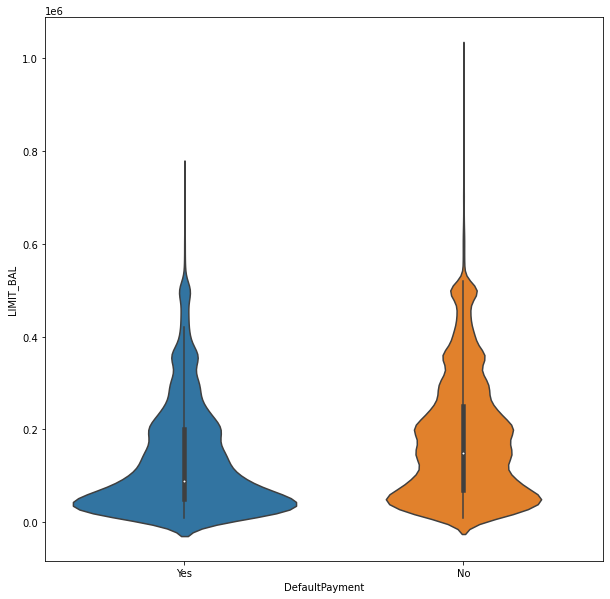

In [27]:
# Count plot for limit balance with respect to DefaultPayment
plt.figure(figsize=(10,10))
ax = sns.violinplot(x="DefaultPayment", y="LIMIT_BAL", data=Df)

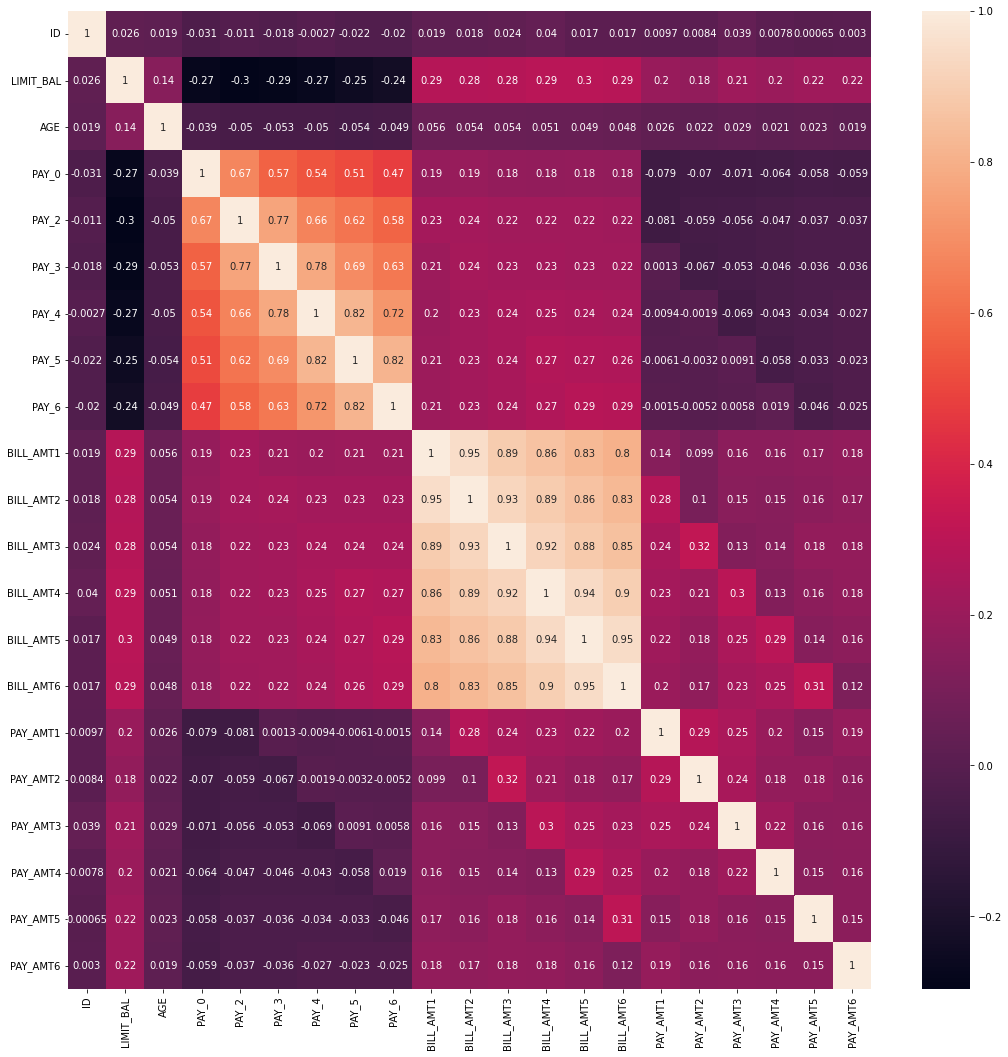

In [28]:
# Find the correlation among the Variables:
correlation = Df.corr()
f,ax = plt.subplots(figsize = (18,18))
sns.heatmap(correlation, annot = True)

In [29]:
# Rename columns
Df.rename(columns={'default payment next month' : 'DefaultPayment'}, inplace=True)
Df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
Df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
Df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APRIL'}, inplace= True)

In [30]:
Df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APRIL,DefaultPayment
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Yes
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


**BILL AMOUNT**

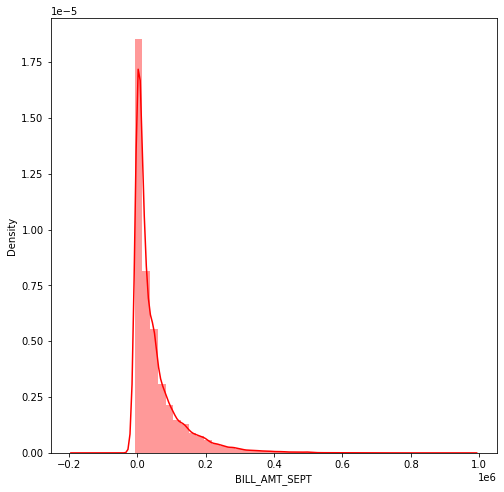

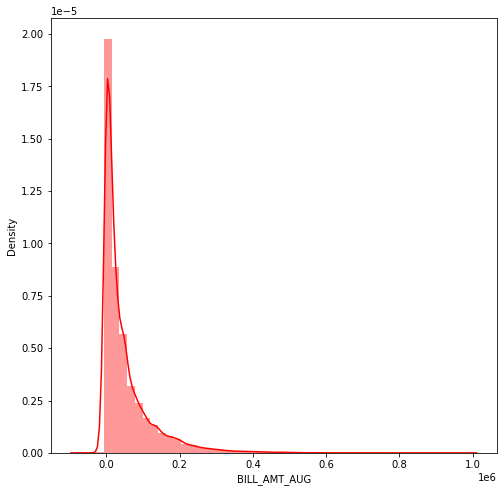

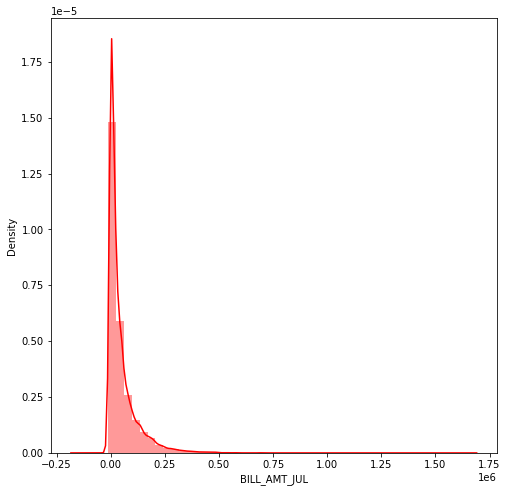

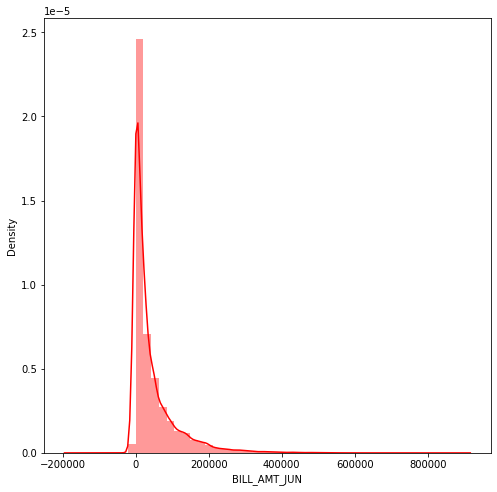

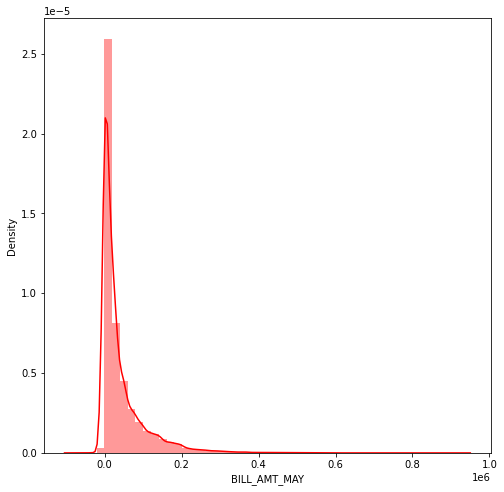

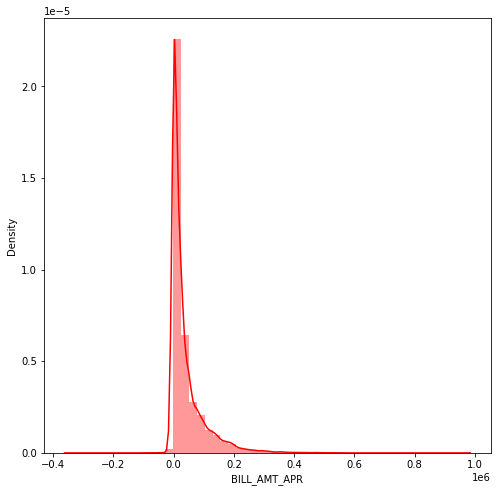

In [31]:
# Ploting Bill Amount
DF_AMT = Df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]

# creating plot
plt.figure(figsize=(8,8))
sns.distplot(Df['BILL_AMT_SEPT'],color="red")

plt.figure(figsize=(8,8))
sns.distplot(Df['BILL_AMT_AUG'],color="red")

plt.figure(figsize=(8,8))
sns.distplot(Df['BILL_AMT_JUL'],color="red")

plt.figure(figsize=(8,8))
sns.distplot(Df['BILL_AMT_JUN'],color="red")

plt.figure(figsize=(8,8))
sns.distplot(Df['BILL_AMT_MAY'],color="red")

plt.figure(figsize=(8,8))
sns.distplot(Df['BILL_AMT_APR'],color="red")


**PAYMENT STATUS**

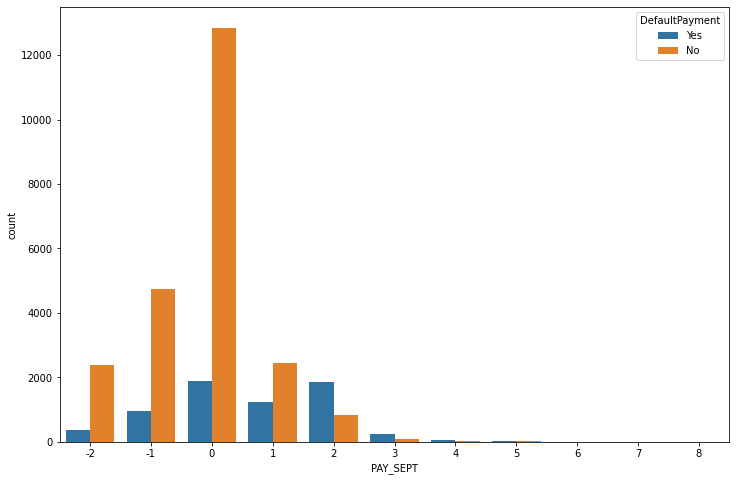

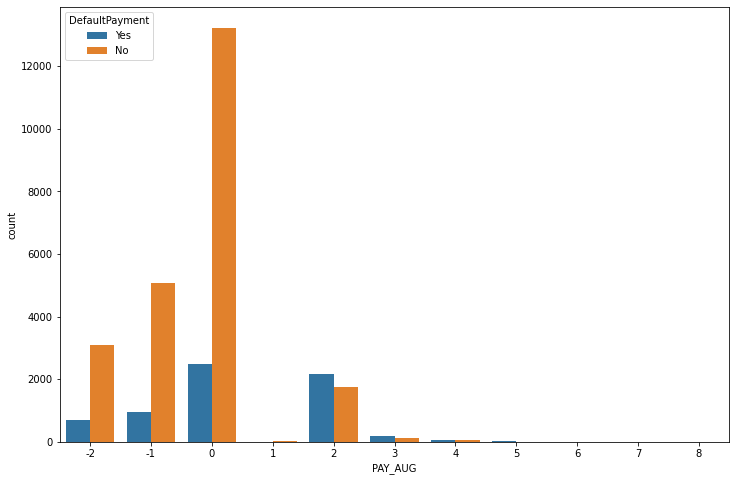

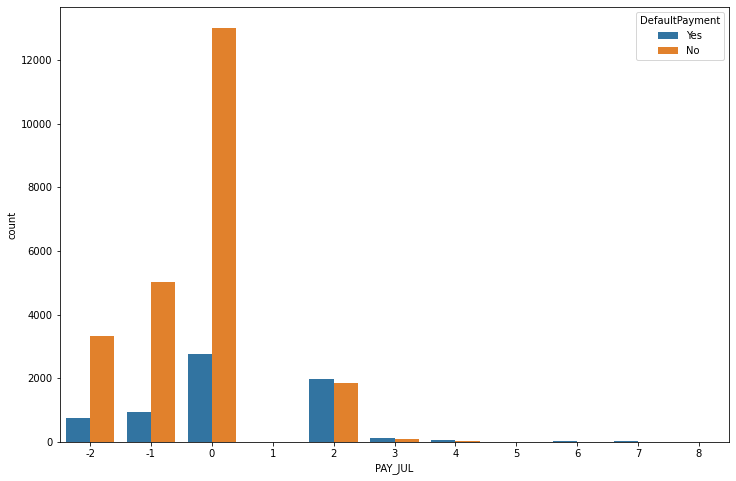

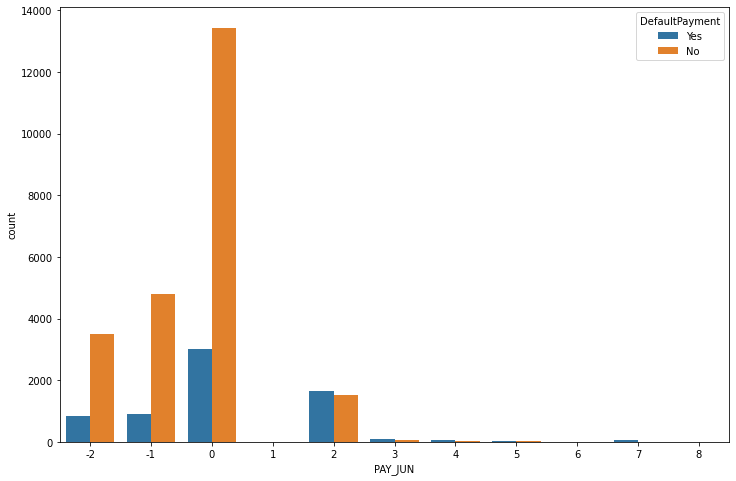

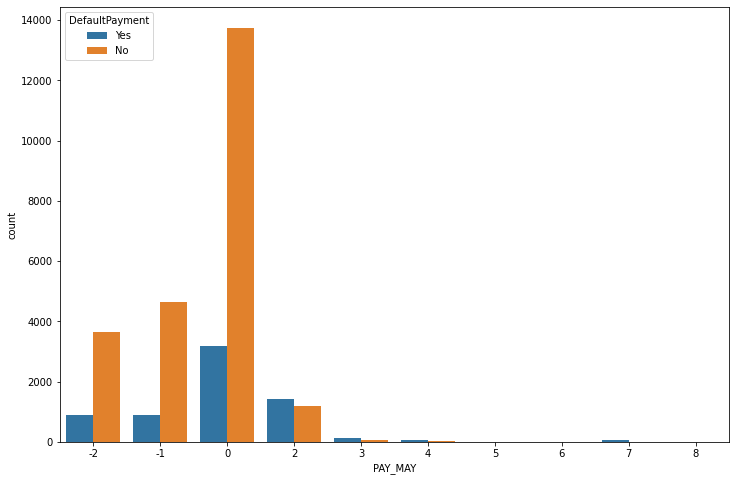

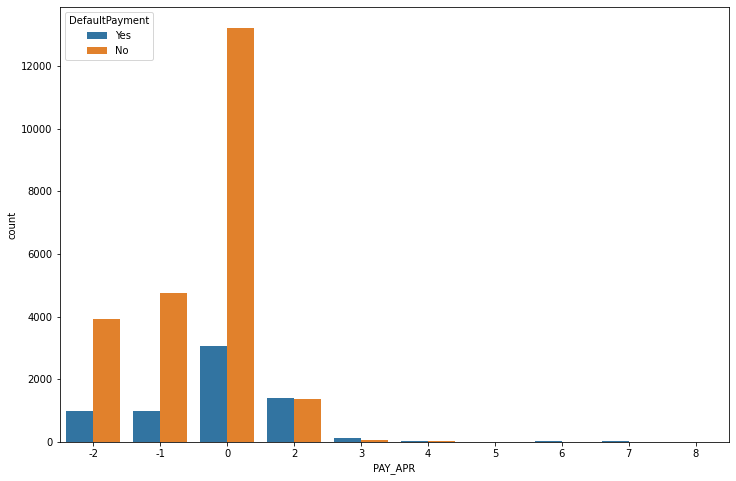

In [32]:
# Ploting payment status
DF_Payment = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in DF_Payment:
  plt.figure(figsize=(12,8))
  sns.countplot(x = col, hue = 'DefaultPayment', data = Df)

**PAID AMOUNT**

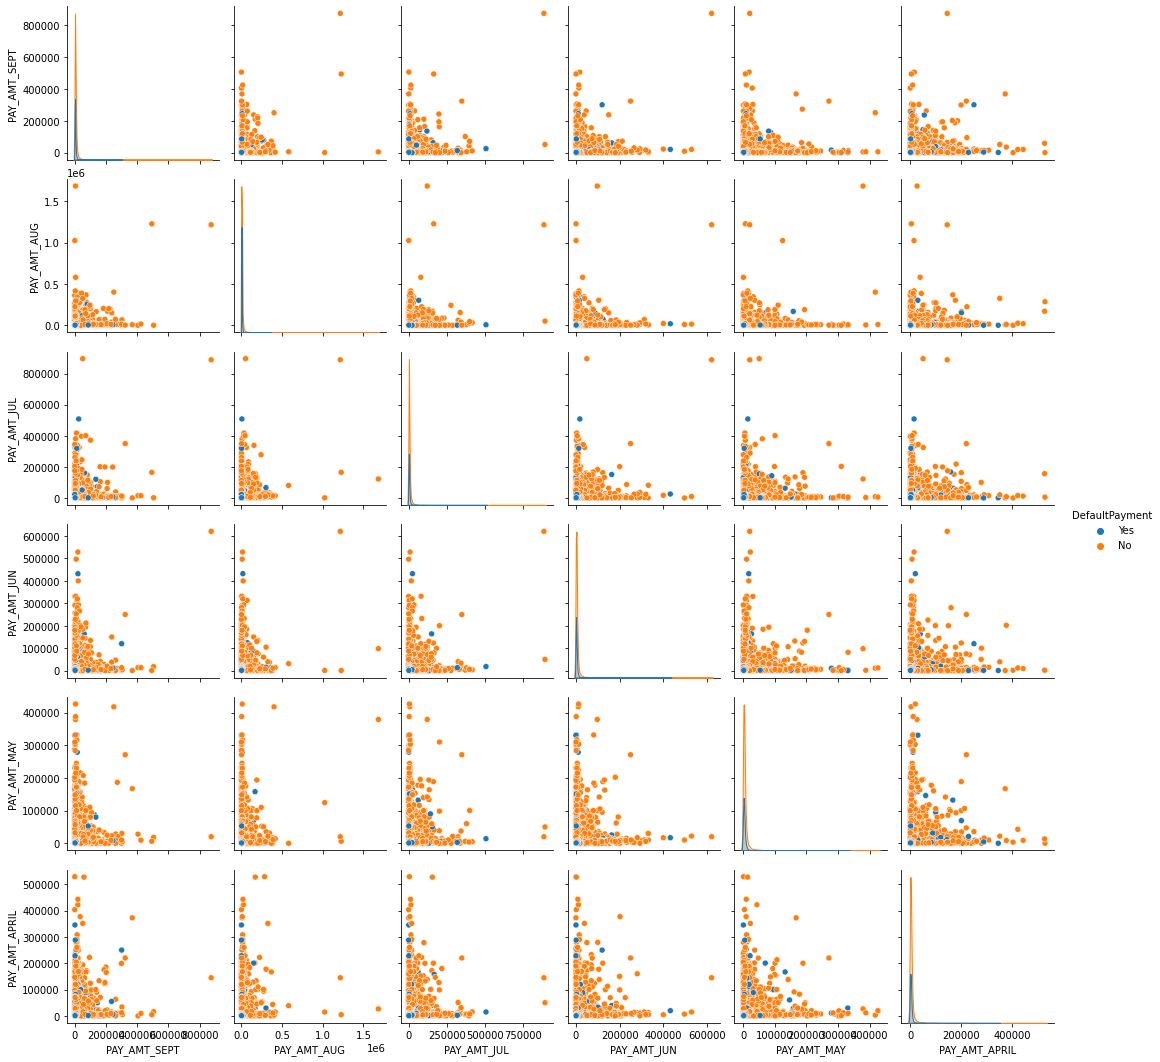

In [33]:
# Ploting paid amount
DF_Paid_Amt = Df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APRIL', 'DefaultPayment']]
# Creating plot
sns.pairplot(data = DF_Paid_Amt, hue='DefaultPayment')

In [34]:
#label encoding
Encoders = {"SEX":{"Female":0,"Male":1}, "DefaultPayment":{"Yes":1, "No":0}}

D_f = Df.replace(Encoders)

In [35]:
D_f.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APRIL,DefaultPayment
0,1,20000,0,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,0,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,0,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,0,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [36]:
D_f.drop(['EDUCATION','MARRIAGE'], axis=1, inplace=True)

In [37]:
D_f.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APRIL,DefaultPayment
0,1,20000,0,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,0,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,0,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,0,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


#**SMOTE(Synthetic Minority Oversampling Technique)**

SMOTE Is An Algorithm That Performs Data Augmentation By Creating Synthetic Data Points Based On The Original Data Points.

In [38]:
# Importing Synthetic Minority Oversampling Technique
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(D_f[(i for i in list(D_f.describe(include='all').columns) if i != 'DefaultPayment')], D_f['DefaultPayment'])

print('Original Unbalanced Dataset Shape', len(D_f))
print('Resampled Balanced Dataset Shape', len(y_smote))

Original Unbalanced Dataset Shape 30000
Resampled Balanced Dataset Shape 46728


In [39]:
# Creating new Dataframe from balanced dataset after SMOTE
Balanced_Df = pd.DataFrame(x_smote, columns=list(i for i in list(Df.describe(include='all').columns) if i != 'DefaultPayment'))

In [40]:
# Adding Target Variable 
Balanced_Df['DefaultPayment'] = y_smote

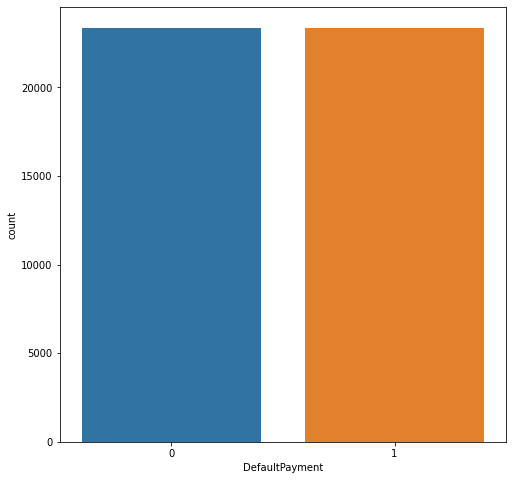

In [41]:
# Checking for Imbalance
plt.figure(figsize=(8,8))
sns.countplot('DefaultPayment', data = Balanced_Df)

In [42]:
# Check shape 
Balanced_Df.shape

(46728, 25)

In [43]:
Balanced_Df.drop(['EDUCATION'], axis=1, inplace=True)

In [44]:
Balanced_Df.drop(['MARRIAGE'], axis=1, inplace=True)

In [45]:
# Display Dataset
Balanced_Df.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APRIL,DefaultPayment
0,1,20000,0,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,0,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,0,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,0,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [46]:
# Display upto 200 columns and rows at once
pd.set_option('Display.max_columns', 200)
pd.set_option('Display.max_rows', 200)

In [47]:
#  Find Correlation 
Balanced_Df.corr()

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APRIL,DefaultPayment
ID,1.000000,0.009912,-0.007666,0.022785,-0.026399,-0.004996,-0.018862,-0.002316,-0.021754,-0.015417,0.017759,0.016297,0.022665,0.036001,0.013565,0.012710,0.009827,0.008551,0.034906,0.008654,-0.004636,0.006722,-0.020676
LIMIT_BAL,0.009912,1.000000,0.005913,0.155383,-0.290605,-0.330525,-0.323641,-0.306808,-0.287804,-0.271616,0.307788,0.298686,0.300878,0.306754,0.308478,0.301979,0.195445,0.181081,0.209159,0.205838,0.214563,0.221489,-0.195859
SEX,-0.007666,0.005913,1.000000,0.087105,-0.000967,0.019701,0.023563,0.017504,0.013615,0.006933,0.036158,0.033233,0.027061,0.022656,0.018780,0.015599,0.021907,0.016547,0.023722,0.016485,0.012578,0.018484,-0.131672
AGE,0.022785,0.155383,0.087105,1.000000,-0.041530,-0.060961,-0.061570,-0.055232,-0.061401,-0.055444,0.054445,0.052188,0.051470,0.049386,0.047575,0.046076,0.027659,0.022775,0.022539,0.018678,0.019424,0.020554,0.001649
PAY_SEPT,-0.026399,-0.290605,-0.000967,-0.041530,1.000000,0.678676,0.580966,0.547338,0.517815,0.487332,0.172167,0.178269,0.174052,0.178665,0.184186,0.183059,-0.087049,-0.075837,-0.075845,-0.070705,-0.063956,-0.062451,0.345776
PAY_AUG,-0.004996,-0.330525,0.019701,-0.060961,0.678676,1.000000,0.776054,0.666033,0.628326,0.587263,0.211328,0.215096,0.211323,0.216027,0.219621,0.220293,-0.085358,-0.062456,-0.056985,-0.049576,-0.040296,-0.041389,0.286712
PAY_JUL,-0.018862,-0.323641,0.023563,-0.061570,0.580966,0.776054,1.000000,0.788539,0.700978,0.651478,0.181498,0.208391,0.205801,0.211999,0.214850,0.215138,-0.005743,-0.069021,-0.054310,-0.049946,-0.040453,-0.039471,0.257435
PAY_JUN,-0.002316,-0.306808,0.017504,-0.055232,0.547338,0.666033,0.788539,1.000000,0.838050,0.741161,0.165286,0.187393,0.207342,0.213279,0.215801,0.216283,-0.018128,-0.009976,-0.071600,-0.048378,-0.037468,-0.034364,0.241526
PAY_MAY,-0.021754,-0.287804,0.013615,-0.061401,0.517815,0.628326,0.700978,0.838050,1.000000,0.836332,0.170346,0.190115,0.207975,0.236487,0.239325,0.237923,-0.014962,-0.011129,0.002287,-0.060359,-0.034930,-0.029571,0.229909
PAY_APR,-0.015417,-0.271616,0.006933,-0.055444,0.487332,0.587263,0.651478,0.741161,0.836332,1.000000,0.174022,0.193279,0.209445,0.235980,0.260449,0.259292,-0.009081,-0.011777,-0.000563,0.012910,-0.046523,-0.029696,0.209754


In [48]:
# Check Dependant And Independant Variable
X = Balanced_Df[(list(i for i in list(Balanced_Df.describe(include='all').columns) if i != 'DefaultPayment'))]
y = Balanced_Df['DefaultPayment']

In [49]:
X.shape

(46728, 22)

In [50]:
y.shape

(46728,)

**Data Transformation**

In [51]:
# Importing Libraries 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Train Test Splitting**

In [52]:
# Impoert Libraries
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

In [53]:
X_train.shape

(37382, 22)

In [54]:
X_test.shape

(9346, 22)

#**Model Implementation**

# Logistic Regression

In [55]:
# importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10, 20, 50, 100] }

Logistic_Model= GridSearchCV(LogisticRegression(), param_grid, scoring = 'recall', n_jobs = -1, verbose = 3, cv = 3)
Logistic_Model.fit(X_train, y_train)

Fitting 3 folds for each of 34 candidates, totalling 102 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 0.7, 0.8, 0.9, 1, 10, 20, 50, 100],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=3)

In [56]:
Logistic_Model.best_estimator_

LogisticRegression(C=0.8)

In [57]:
Logistic_Model.score(X_train, y_train)

0.6811834572789043

In [58]:
y_pred_Logistic_train = Logistic_Model.predict(X_train)

In [59]:
y_pred_Logistic_test = Logistic_Model.predict(X_test)

 **Model Evaluation**

In [60]:
# Importing Libraries
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [61]:
# check model evaluation
Logistic_train_accuracy= accuracy_score(y_train, y_pred_Logistic_train)
Logistic_test_accuracy= accuracy_score(y_test, y_pred_Logistic_test)

print("The accuracy on train data is ", Logistic_train_accuracy)
print("The accuracy on test data is ", Logistic_test_accuracy)

The accuracy on train data is  0.6739874806056391
The accuracy on test data is  0.676225123047293


In [62]:
# Check Prediction
Logistic_test_precision= precision_score(y_test, y_pred_Logistic_test)
Logistic_test_recall= recall_score(y_test, y_pred_Logistic_test)
Logistic_test_f1score= f1_score(y_test, y_pred_Logistic_test)
Logistic_test_roc_auc= roc_auc_score(y_test, y_pred_Logistic_test)
Logistic_test_confusion_matrix= confusion_matrix(y_test, y_pred_Logistic_test)

In [63]:
Model_Value = pd.DataFrame([['Logistic Regression', Logistic_test_accuracy, Logistic_test_precision, Logistic_test_recall, 
                         Logistic_test_f1score, Logistic_test_roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC Score'])
Model_Value

,Model,Accuracy,Precision,Recall,F1 Score,ROC Score
0,Logistic Regression,0.676225,0.675474,0.678365,0.676917,0.676225


**Confusion Matrix**

In [64]:
# Find value
print(Logistic_test_confusion_matrix)

[[3150 1523]
 [1503 3170]]


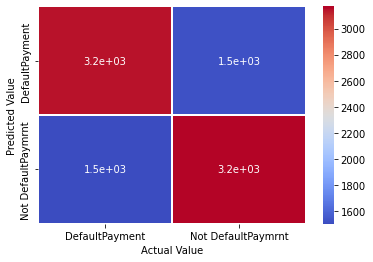

In [65]:
# Plot Matrix
labels = ['DefaultPayment', 'Not DefaultPaymrnt']
ax= plt.subplot()
sns.heatmap(Logistic_test_confusion_matrix, annot= True,linewidths=1, cmap='coolwarm', ax= ax)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# Stochastic Gradient Descent

In [66]:
# Importing libraries
from sklearn.linear_model import SGDClassifier

sgd_params = {'alpha': [0.0001,0.00001, 0.001, 0.01,0.05,0.1,0.2,0.3,0.4,0.5, 1.0, 5.0]}

sgd_Model = GridSearchCV(SGDClassifier(class_weight='balanced'), param_grid=sgd_params, scoring='recall', cv=3, n_jobs=-1)
sgd_Model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SGDClassifier(class_weight='balanced'), n_jobs=-1,
             param_grid={'alpha': [0.0001, 1e-05, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 1.0, 5.0]},
             scoring='recall')

In [67]:
sgd_Model.best_params_

{'alpha': 1e-05}

In [68]:
sgd_Model.score(X_train, y_train)

0.7158525493553047

In [69]:
y_pred_sgd_train = sgd_Model.predict(X_train)
y_pred_sgd_test = sgd_Model.predict(X_test)

**Model Evaluation**

In [70]:
# Find Model accuracy

sgd_train_accuracy= accuracy_score(y_train, y_pred_sgd_train)
sgd_test_accuracy= accuracy_score(y_test, y_pred_sgd_test)

print("The accuracy on train data is ", sgd_train_accuracy)
print("The accuracy on test data is ", sgd_test_accuracy)

The accuracy on train data is  0.6529345674388743
The accuracy on test data is  0.6579285255724374


In [71]:
# find prediction value
sgd_test_precision= precision_score(y_test, y_pred_sgd_test)
sgd_test_recall= recall_score(y_test, y_pred_sgd_test)
sgd_test_f1score= f1_score(y_test, y_pred_sgd_test)
sgd_test_roc_auc= roc_auc_score(y_test, y_pred_sgd_test)
sgd_test_confusion_matrix= confusion_matrix(y_test, y_pred_sgd_test)

In [72]:
# creat  new Dataframe
Model = pd.DataFrame([['Stochastic Gradient Descent', sgd_test_accuracy, sgd_test_precision, sgd_test_recall, 
                         sgd_test_f1score, sgd_test_roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC Score'])
Model_Value= Model_Value.append(Model, ignore_index = True)
Model_Value

,Model,Accuracy,Precision,Recall,F1 Score,ROC Score
0,Logistic Regression,0.676225,0.675474,0.678365,0.676917,0.676225
1,Stochastic Gradient Descent,0.657929,0.640625,0.719452,0.677754,0.657929


**Confusion Matrix**

In [73]:
print(sgd_test_confusion_matrix)

[[2787 1886]
 [1311 3362]]


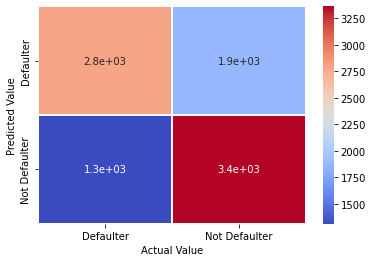

In [74]:
# plot matrix
labels = ['Defaulter', 'Not Defaulter']
ax= plt.subplot()
sns.heatmap(sgd_test_confusion_matrix, annot= True,linewidths=1, cmap='coolwarm', ax= ax)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# Decision Tree 

In [75]:
# Importing Libraries
from sklearn.tree import DecisionTreeClassifier

Parameters = {'max_depth':[2,4,6,8,10],
              'min_samples_leaf':[2,4,6,8,10], 
              'min_samples_split':[2,4,6,8,10],
              }

DT_Model = GridSearchCV(DecisionTreeClassifier(), param_grid= Parameters, scoring = 'recall', cv=3, n_jobs=-1)
DT_Model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='recall')

In [76]:
DT_Model.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [77]:
DT_Model.score(X_train, y_train)

0.6764218072869296

In [78]:
y_pred_DT_train = DT_Model.predict(X_train)
y_pred_DT_test = DT_Model.predict(X_test)

**Model Evaluation**

In [79]:
# find accuracy
DT_train_accuracy= accuracy_score(y_train, y_pred_DT_train)
DT_test_accuracy= accuracy_score(y_test, y_pred_DT_test)

print("The accuracy on train data is ", DT_train_accuracy)
print("The accuracy on test data is ", DT_test_accuracy)

The accuracy on train data is  0.7752394200417313
The accuracy on test data is  0.7433126471217634


In [80]:
# find prediction value
DT_test_precision= precision_score(y_test, y_pred_DT_test)
DT_test_recall= recall_score(y_test, y_pred_DT_test)
DT_test_f1score= f1_score(y_test, y_pred_DT_test)
DT_test_roc_auc= roc_auc_score(y_test, y_pred_DT_test)
DT_test_confusion_matrix= confusion_matrix(y_test, y_pred_DT_test)

In [81]:
Model = pd.DataFrame([['Decision Tree ', DT_test_accuracy, DT_test_precision, DT_test_recall, 
                         DT_test_f1score, DT_test_roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC Score'])
Model_Value= Model_Value.append(Model, ignore_index = True)
Model_Value

,Model,Accuracy,Precision,Recall,F1 Score,ROC Score
0,Logistic Regression,0.676225,0.675474,0.678365,0.676917,0.676225
1,Stochastic Gradient Descent,0.657929,0.640625,0.719452,0.677754,0.657929
2,Decision Tree,0.743313,0.800794,0.647764,0.716195,0.743313


**Confusion Matrix**

In [82]:
print(DT_test_confusion_matrix)

[[3920  753]
 [1646 3027]]


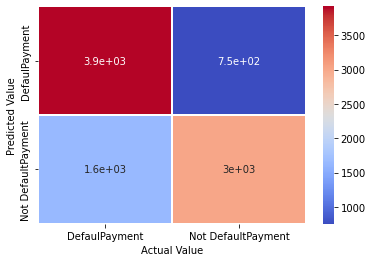

In [83]:
# plot matrix
labels = ['DefaulPayment', 'Not DefaultPayment']
ax= plt.subplot()
sns.heatmap(DT_test_confusion_matrix, annot= True, linewidths=1, cmap='coolwarm', ax= ax)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# Default XGBoost

In [84]:
# importing libraries
from xgboost import XGBClassifier
xgb = XGBClassifier(class_weight='Balanced')
xgb.fit(X_train, y_train)

XGBClassifier(class_weight='Balanced')

In [85]:
xgb.score(X_train, y_train)

0.7758546894227168

In [86]:
# find default value
y_pred_Default_xgb_train = xgb.predict(X_train)
y_pred_Default_xgb_test = xgb.predict(X_test)

**Model Evaluation**

In [87]:
# model evaluation accuracy
Default_xgb_train_accuracy= accuracy_score(y_train, y_pred_Default_xgb_train)
Default_xgb_test_accuracy= accuracy_score(y_test, y_pred_Default_xgb_test)

print("The accuracy on train data is ", Default_xgb_train_accuracy)
print("The accuracy on test data is ", Default_xgb_test_accuracy)

The accuracy on train data is  0.7758546894227168
The accuracy on test data is  0.7749839503530922


In [88]:
# find prediction value
Default_xgb_test_precision= precision_score(y_test, y_pred_Default_xgb_test)
Default_xgb_test_recall= recall_score(y_test, y_pred_Default_xgb_test)
Default_xgb_test_f1score= f1_score(y_test, y_pred_Default_xgb_test)
Default_xgb_test_roc_auc= roc_auc_score(y_test, y_pred_Default_xgb_test)
Default_xgb_test_confusion_matrix= confusion_matrix(y_test, y_pred_Default_xgb_test)

In [89]:
# new dataframe
Model = pd.DataFrame([['Default XGBoost', Default_xgb_test_accuracy, Default_xgb_test_precision, Default_xgb_test_recall, 
                         Default_xgb_test_f1score, Default_xgb_test_roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC Score'])
Model_Value= Model_Value.append(Model, ignore_index = True)
Model_Value

,Model,Accuracy,Precision,Recall,F1 Score,ROC Score
0,Logistic Regression,0.676225,0.675474,0.678365,0.676917,0.676225
1,Stochastic Gradient Descent,0.657929,0.640625,0.719452,0.677754,0.657929
2,Decision Tree,0.743313,0.800794,0.647764,0.716195,0.743313
3,Default XGBoost,0.774984,0.811289,0.716670,0.761050,0.774984


**Confusion Matrix**

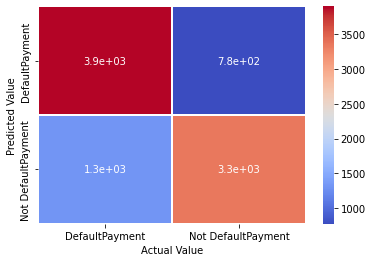

In [90]:
# plot matrix
labels = ['DefaultPayment', 'Not DefaultPayment']
ax= plt.subplot()
sns.heatmap(Default_xgb_test_confusion_matrix, annot= True, linewidths=1, cmap='coolwarm', ax= ax)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# GridSearch on XGBoost

In [91]:
# importing libraries
from xgboost import  XGBClassifier

param_xgb ={'n_estimators': [50,80,100],
            'max_depth': [3,5,7],
            'learning_rate': [0.1,0.2], 
            'min_child_weight': [2,3]
            }

xgb_Model = GridSearchCV(XGBClassifier(class_weight='Balanced'), param_grid=param_xgb, scoring='recall', cv=3, n_jobs=-1)
xgb_Model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=XGBClassifier(class_weight='Balanced'), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5, 7],
                         'min_child_weight': [2, 3],
                         'n_estimators': [50, 80, 100]},
             scoring='recall')

In [92]:
xgb_Model.best_params_

{'learning_rate': 0.2,
 'max_depth': 7,
 'min_child_weight': 3,
 'n_estimators': 100}

In [93]:
xgb_Model.score(X_train, y_train)

0.8757155850409288

In [94]:
y_pred_xgb_train = xgb_Model.predict(X_train)
y_pred_xgb_test = xgb_Model.predict(X_test)

**Model Evaluation**

In [95]:
# find  model accuracy
xgb_train_accuracy= accuracy_score(y_train, y_pred_xgb_train)
xgb_test_accuracy= accuracy_score(y_test, y_pred_xgb_test)

print("The Accuracy on train Data is ", xgb_train_accuracy)
print("The Accuracy on test Data is ", xgb_test_accuracy)

The Accuracy on train Data is  0.9042587341501257
The Accuracy on test Data is  0.8297667451316071


In [96]:
# find pediction value

xgb_test_precision= precision_score(y_test, y_pred_xgb_test)
xgb_test_recall= recall_score(y_test, y_pred_xgb_test)
xgb_test_f1score= f1_score(y_test, y_pred_xgb_test)
xgb_test_roc_auc= roc_auc_score(y_test, y_pred_xgb_test)
xgb_test_confusion_matrix= confusion_matrix(y_test, y_pred_xgb_test)

In [97]:
# find model value
Model = pd.DataFrame([['GridSearch XGBoost', xgb_test_accuracy, xgb_test_precision, xgb_test_recall, xgb_test_f1score, xgb_test_roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC Score'])
Model_Value= Model_Value.append(Model, ignore_index = True)
Model_Value

,Model,Accuracy,Precision,Recall,F1 Score,ROC Score
0,Logistic Regression,0.676225,0.675474,0.678365,0.676917,0.676225
1,Stochastic Gradient Descent,0.657929,0.640625,0.719452,0.677754,0.657929
2,Decision Tree,0.743313,0.800794,0.647764,0.716195,0.743313
3,Default XGBoost,0.774984,0.811289,0.716670,0.761050,0.774984
4,GridSearch XGBoost,0.829767,0.852632,0.797346,0.824063,0.829767


Here We can see that from above analysis that Default XGBoost giving us the higher recall value than the GridSearch XGBoost. Here we are more curious about Recall.


**Confusion Matrix**

In [98]:
print(confusion_matrix(y_test, y_pred_xgb_test))

[[4029  644]
 [ 947 3726]]


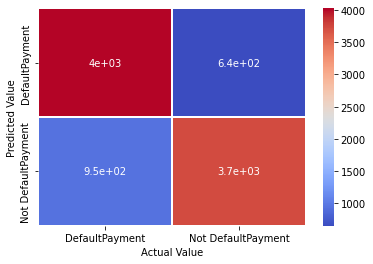

In [99]:
# Plot confusion matrix
labels = ['DefaultPayment', 'Not DefaultPayment']
ax= plt.subplot()
sns.heatmap(xgb_test_confusion_matrix, annot= True, linewidths=1, cmap='coolwarm', ax= ax)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# ROC Curve

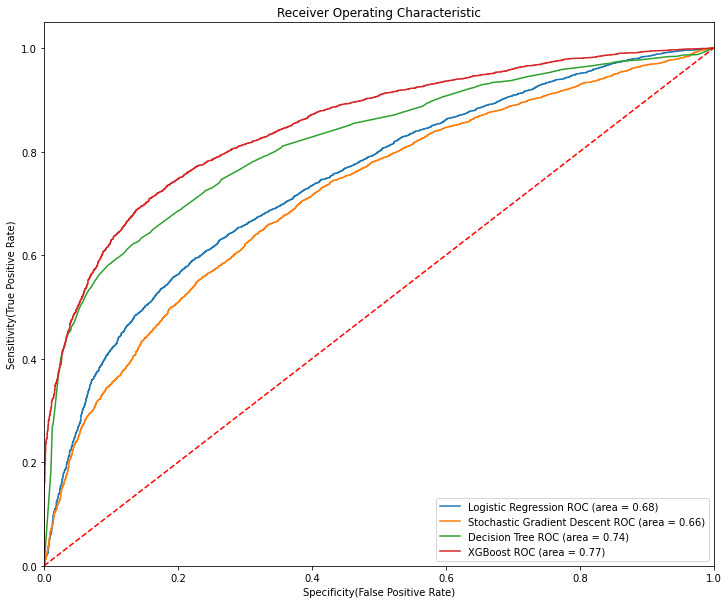

In [122]:
# importing libraries
from sklearn.calibration import CalibratedClassifierCV
import sklearn.metrics as metrics

# false positive rate,
#fpr= FP/(TN+FP) OR 
#fpr=1-specificty, 
#tpr=sensitivity 

y_pred_logistic_p =Logistic_Model.predict_proba(X_test)[:, 1]
calibrator = CalibratedClassifierCV(sgd_Model, cv='prefit')
sgd_model=calibrator.fit(X_train, y_train)
y_pred_sgd_p = sgd_model.predict_proba(X_test)[:,1]
y_pred_dt_p =DT_Model.predict_proba(X_test)[:,1]

y_pred_xgb_p =xgb.predict_proba(X_test)[:,1]

model = [Logistic_Model, sgd_Model, DT_Model, xgb, ]

models=[y_pred_logistic_p, y_pred_sgd_p , y_pred_dt_p, y_pred_xgb_p]
label=['Logistic Regression', 'Stochastic Gradient Descent', 'Decision Tree', 'XGBoost']

# Plotting ROC Curves
plt.figure(figsize=(12, 10))
m=np.arange(4)
for m in m:
    fpr, tpr, thresholds= metrics.roc_curve(y_test, models[m])
    auc = metrics.roc_auc_score(y_test,model[m].predict(X_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (label[m], auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()